### Implementation of Simple Linear Regression 
1. Data Colllection: - Using pre-defined datasets 
2. Data Preparation: - Using Feature Selection on datasets and using features which are most likeable to be used. 
3. Model Development: - Using Linear regresion on the datasets to train on labelled datasets 
4. Model Evaluation: - Testing accuracy, prediction of the model

- **Task**: - Create a simple regression model that will predict a unknown car `X` $(CO_2)$ consumption. 

In [1]:
#Importing libraries 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

In [3]:
#Loading datasets 
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)

In [4]:
#Test the dataset to take (5) row sample from space 
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
327,2014,DODGE,GRAND CARAVAN FFV,MINIVAN,3.6,6,A6,E,19.2,13.1,16.5,17,264
1008,2014,TOYOTA,VENZA,SUV - SMALL,2.7,4,AS6,X,11.4,8.2,10.0,28,230
546,2014,INFINITI,QX80 4WD,SUV - STANDARD,5.6,8,AS7,Z,17.4,12.1,15.0,19,345
736,2014,MERCEDES-BENZ,CLS 550 4MATIC,COMPACT,4.7,8,AS7,Z,13.3,9.4,11.5,25,264
324,2014,DODGE,DURANGO AWD FFV,SUV - STANDARD,3.6,6,A8,X,13.9,9.8,12.1,23,278


In [5]:
#Stastically, describe the dataset (mean, min, %(0-100), standard deviation, max)
#This will help us to do data preparation for feature selecton 
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
#Data Preparation: - Selecting dependent features -> high(CO_2) consumption
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.sample(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
440,5.3,8,21.5,344
286,3.6,6,10.9,251
308,3.6,6,14.8,237
401,2.0,4,7.7,177
875,3.4,6,10.1,232
610,1.6,4,9.6,221
360,2.0,4,10.0,230
448,6.0,8,18.8,432
486,3.5,6,10.9,251
927,6.7,12,17.1,393


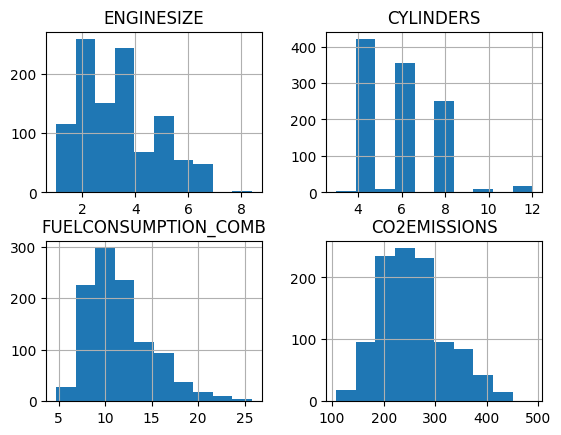

In [8]:
#Analysis: - Relationship of each column 
viz = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist()
plt.show()

### Analysis: - 
- **Engine Size**: - 2 - 6 is the most used ones in car datasets 
- **Cylinders**: - (4 - 8) is most likeable to be used 
- **Fuel Comsumption** & **Emissiion**: - (The relationship is more likable)

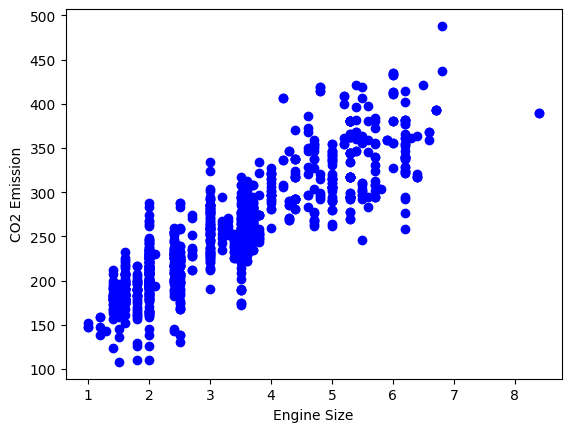

In [30]:
#Visualization: - Check relationship of all features with Emission feature 
#Relationship of Engine Size and Emission 
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.show()

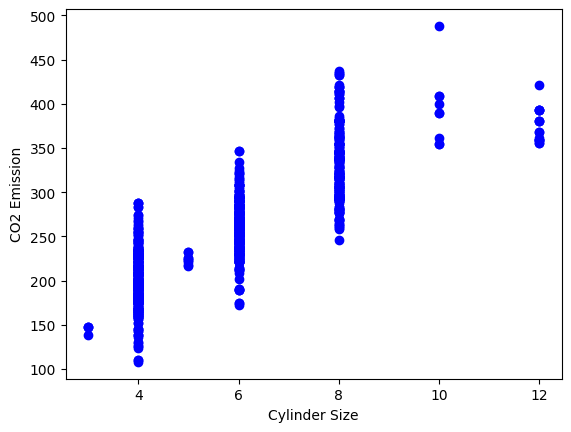

In [31]:
#Relationship of Cylinder and Emission
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Cylinder Size')
plt.ylabel('CO2 Emission')
plt.show()

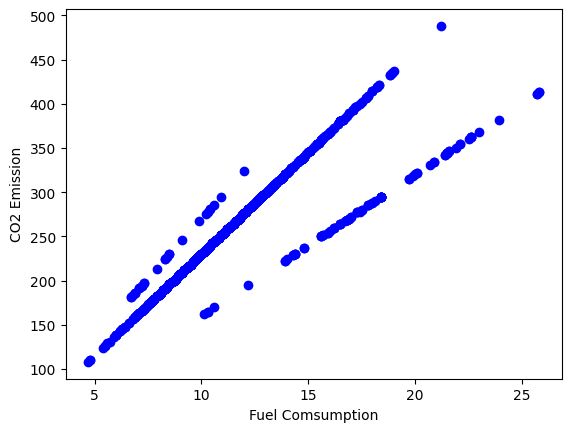

In [32]:
#Relationship of Fuel Comsumption and CO2 Emission
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Fuel Comsumption")
plt.ylabel("CO2 Emission")
plt.show()

- Relationship of emission with fuel and cylinders are not continuous and non - linear 
- **Linear Relation**: - Emission and EngineSize 

In [33]:
#Convert dataframes to list of floating points 
x = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

- Preparing dataset for training and testing 
1. **Testing dataset**: - 20 - 30 % of the selected data space 
2. **Training dataset**: - (70 - 80)% (To optimize and maximize model prediction)

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

type(x_train), np.shape(x_train), np.shape(x_test)

(numpy.ndarray, (853,), (214,))

1. Now, we need to find intercerpt and slope of best fit line to fit model 
2. Basic Idea: - take mean of x and y, calculate m (slope as)
- **Slope**: - 
    - $m = Σ (x_i - xbar) * y_i / Σ (x_i - xbar)^2$ 
- **Intercept**: -
    - $C = m * xbar - ybar$

- Finding slope and intercept to best fit the model using linear_model in sklearn

In [43]:
from sklearn import linear_model

#Using liner Regression function from liner_model class 
regressor = linear_model.LinearRegression()

#Finding best fit line for training datasets (x_train, y_train)
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
regressor.fit(x_train.reshape(-1, 1), y_train)

#Getting Slope and intercept values 
print('Slope :', regressor.coef_[0])
print('Intercept: ', regressor.intercept_)


Slope : 38.992978724434074
Intercept:  126.28970217408721


Text(0, 0.5, 'CO2 Emission')

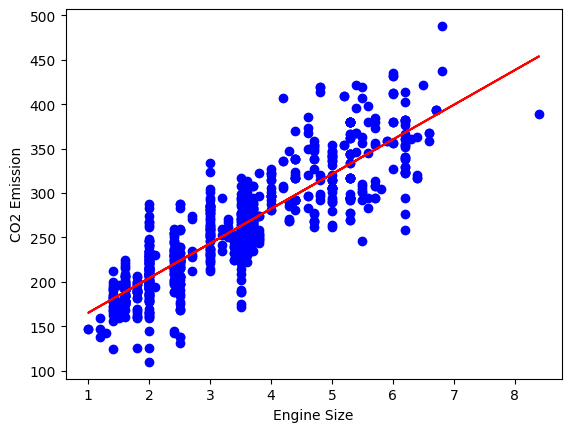

In [44]:
#Visualize: - Training dataset for Engine_size with Emission

#Scatter Plot
plt.scatter(x_train, y_train, color='blue')
#BestFit line (y = slope * x + intercept)
plt.plot(x_train, regressor.coef_[0] * x_train + regressor.intercept_, '-r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")

## TODO List
- Model Evaluation
- Tradeoff of this approach 
- Limitations of this approach 